In [1]:
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_trainKP.csv')
y_test = pd.read_csv('y_testKP.csv')
curva = pd.read_csv('CurvasExpT8.csv')

In [3]:
########## IMPLEMENTACIÓN DE VECTORES DE SOPORTE REGRESIÓN ##########
#Defino el algoritmo a utilizar
svr = SVR(kernel='poly', C=1.0, gamma=0.1)
#Entreno el modelo
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma=0.1, kernel='poly')

In [4]:
# Search grid de SVR
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.01,0.8,1,1.5,2,3,4], 'gamma': ['scale','auto',0.1,0.001,0.5,1,1.5,2], 'degree': [1,2,3],
              'coef0': [0,0.5,1]}
inicio = time.time()            
svr_final=SVR()
# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator =  svr_final,
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train.values.ravel())
fin = time.time()
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_coef0,param_degree,param_gamma,param_kernel,mean_test_score,std_test_score,mean_train_score,std_train_score
2013,4,1,3,2,poly,0.933336,0.016162,0.940116,0.001974
1725,3,1,3,2,poly,0.931504,0.016559,0.939102,0.002141
2009,4,1,3,1.5,poly,0.930709,0.016741,0.938027,0.001967
1437,2,1,3,2,poly,0.930632,0.015252,0.936827,0.001890
1721,3,1,3,1.5,poly,0.929468,0.017300,0.936700,0.002006
1149,1.5,1,3,2,poly,0.929295,0.016024,0.935853,0.002114
1433,2,1,3,1.5,poly,0.927447,0.016955,0.934228,0.001638
1917,4,0.5,3,2,poly,0.927272,0.019282,0.935599,0.002292
1981,4,1,2,2,poly,0.926406,0.022782,0.933510,0.001644
861,1,1,3,2,poly,0.925412,0.016913,0.932844,0.001692


In [5]:
print(fin-inicio)

422.3328456878662


In [6]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 4, 'coef0': 1, 'degree': 3, 'gamma': 2, 'kernel': 'poly'} : 0.933335774155089 None


In [7]:
svr_final = grid.best_estimator_

In [8]:
#Convertir a valores numéricos de numpy
#X_train = np.asarray(X_train)
#X_test = np.asarray(X_test)
#y_train = np.asarray(y_train)
#y_test = np.asarray(y_test)

In [9]:
print()
print('DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN')
print()
print('Precisión del modelo en validación:')
print(svr_final.score(X_test, y_test))


DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN

Precisión del modelo en validación:
0.9473528203035528


In [10]:
print()
print('DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN')
print()
print('Precisión del modelo en entranamiento:')
print(svr_final.score(X_train, y_train))


DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN

Precisión del modelo en entranamiento:
0.9404304419397634


In [11]:
predicciones = svr_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.05544717591989278


In [12]:
predicciones = svr_final.predict(X = X_train)

rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de TRAIN es: {rmse}")

El error (rmse) de TRAIN es: 0.05883447383819059


In [13]:
#Convertir a valores numéricos de numpy
X_train = np.matrix(X_train)
X_test = np.matrix(X_test)
y_train = np.matrix(y_train)
y_test = np.matrix(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


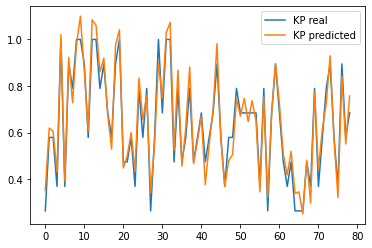

In [14]:
plt.plot(y_train[1:80,0], label='KP real')
plt.plot(svr_final.predict(X_train)[1:80,], label='KP predicted')
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


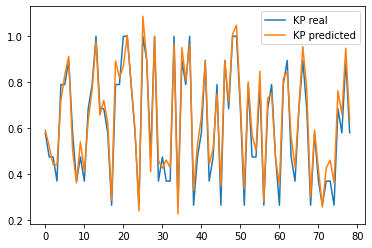

In [15]:
plt.plot(y_test[1:80,0], label='KP real')
plt.plot(svr_final.predict(X_test)[1:80,], label='KP predicted')
plt.legend(loc='upper right')
plt.show()

In [16]:
salidanet=svr_final.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [17]:
salidaNet_test=pd.DataFrame(salidanet)

salidaNet_test.reset_index().to_csv('salidaSVR_KPT8.csv',header=True,index=False)


In [18]:
joblib.dump(svr_final,'svrKP.pkl')

['svrKP.pkl']

In [19]:
salida = svr_final.predict(curva)

In [20]:
salidadf=pd.DataFrame(salida)
salidadf.reset_index().to_csv('saliCursExpT8kp.csv',header=True,index=False)

In [21]:
valorUO = (salida)[0,]
print("El valor de UO es:", valorUO)

El valor de UO es: 0.5303953139359432
